In [1]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import widgets, Output
from folium.plugins import TimeSliderChoropleth
from IPython.display import display
import numpy as np

In [2]:
import pandas as pd
# URL of the CSV file
url = 'https://raw.githubusercontent.com/TheNewtonsRing/Global-YouTube-Statistics-2023/main/Global%20YouTube%20Statistics.csv'
df = pd.read_csv(url, encoding='latin1')
# Display the first few rows of the DataFrame
df.to_csv('global_youtube_statistics.csv', index=False)
df = pd.read_csv('global_youtube_statistics.csv')
df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [3]:
missing_values = df.isna().sum()
missing_values 

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [4]:
df_interpolated = df.interpolate(method='linear')

# Check if there are any remaining missing values
print("Remaining missing values after interpolation:")
print(df_interpolated.isna().sum())

Remaining missing values after interpolation:
rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month 

In [5]:
categorical_columns = ['category', 'Country', 'Abbreviation', 'channel_type']
for column in categorical_columns:
    df_interpolated[column].fillna(method='ffill', inplace=True)

# Backward fill missing values for 'created_month' column
df_interpolated['created_month'].fillna(method='bfill', inplace=True)

# Check if there are any remaining missing values
print("Remaining missing values after forward fill and backward fill:")
print(df_interpolated.isna().sum())


Remaining missing values after forward fill and backward fill:
rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                        

In [6]:
df = df.dropna(subset=['Latitude', 'Longitude'])

In [7]:
df

rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por Aï¿     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation               youtubemovies        1   United States   
2       Entertainment                     MrBeast      741   United States   
3           Education  Cocomelon - Nursery Rhymes      966   United States   
4               Shows                   SET India   116536           India   
..                ...                         ...      ...             ...   
990            Sports               Natan por Aï¿     1200          Brazil   
991    People & Blogs    Free Fire India Official     1500           India   
992               NaN                 HybridPanda     2452  United Kingdom   
993            Gaming                 RobTopGames       39          Sweden   
994            Comedy                Make Joke Of       62           India   

    Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0             IN          Music  ...                     2000000.0   
1             US          Games  ...                           NaN   
2             US  Entertainment  ...                     8000000.0   
3             US      Education  ...                     1000000.0   
4             IN  Entertainment  ...                     1000000.0   
..           ...            ...  ...                           ...   
990           BR  Entertainment  ...                      700000.0   
991           IN          Games  ...                      300000.0   
992           GB          Games  ...                        1000.0   
993           SE          Games  ...                      100000.0   
994           IN         Comedy  ...                      100000.0   

     created_year  created_month  created_date  \
0          2006.0            Mar          13.0   
1          2006.0            Mar           5.0   
2          2012.0            Feb          20.0   
3          2006.0            Sep           1.0   
4          2006.0            Sep          20.0   
..            ...            ...           ...   
990        2017.0            Feb          12.0   
991        2018.0            Sep          14.0   
992        2006.0            Sep          11.0   
993        2012.0            May           9.0   
994        2017.0            Aug           1.0   

     Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                       28.1  1.366418e+09               5.36   
1                                       88.2  3.282395e+08              14.70   
2                                       88.2  3.282395e+08              14.70   
3                                       88.2  3.282395e+08              14.70   
4                                       28.1  1.366418e+09               5.36   
..                                       ...           ...                ...   
990                                     51.3  2.125594e+08              12.08   
991                                     28.1  1.366418e+09               5.36   
992                                     60.0  6.683440e+07               3.85   

In [8]:
filtered_df = df[['Youtuber', 'Country', 'Latitude', 'Longitude', 'video views', 'lowest_monthly_earnings', 'highest_monthly_earnings']]

In [9]:
# Drop rows with NaN values in 'Latitude' and 'Longitude' columns




In [10]:
# Create a map centered at a specific location with a tiled basemap
m = folium.Map(location=[filtered_df['Latitude'].mean(), filtered_df['Longitude'].mean()], zoom_start=2, control_scale=True)

# Add tiled basemaps with different options (you can choose any of these or add more)
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('stamenterrain').add_to(m)

# Create a MarkerCluster layer for the markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each YouTuber
for i, row in filtered_df.iterrows():
    popup_html = f"<b>Youtuber:</b> {row['Youtuber']}<br>" \
                 f"<b>Country:</b> {row['Country']}<br>" \
                 f"<b>Video Views:</b> {row['video views']}<br>" \
                 f"<b>Lowest Monthly Earnings:</b> {row['lowest_monthly_earnings']}<br>" \
                 f"<b>Highest Monthly Earnings:</b> {row['highest_monthly_earnings']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_html,
        icon=folium.Icon(color='blue'),  # Set marker color
    ).add_to(marker_cluster)

# Add Layer Control to toggle basemaps
folium.LayerControl().add_to(m)

# Add animation and title
folium.plugins.AntPath(
    locations=[[filtered_df['Latitude'].mean(), filtered_df['Longitude'].mean()]], 
    dashArray=[10, 20], 
    delay=800,
    color='red',
    pulseColor='orange'
).add_to(m)

folium.map.Marker(
    [filtered_df['Latitude'].mean(), filtered_df['Longitude'].mean()],
    icon=folium.DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html='',
    )
).add_to(m)

# Create a dropdown widget for YouTuber search
youtuber_dropdown = widgets.Dropdown(
    options=filtered_df['Youtuber'].tolist(),
    description='Search :',
    disabled=False,
)
display(youtuber_dropdown)

# Create an output widget to display the annual income
output_annual_income = Output()

# Define a function to handle the search button click event
def search_annual_income(b):
    selected_youtuber = youtuber_dropdown.value
    with output_annual_income:
        output_annual_income.clear_output()
        # Filter the DataFrame for the selected YouTuber
        youtuber_data = filtered_df[filtered_df['Youtuber'] == selected_youtuber]
        if not youtuber_data.empty:
            annual_income = (youtuber_data['lowest_monthly_earnings'] + youtuber_data['highest_monthly_earnings']) / 2 * 12
            print(f"Annual Income for {selected_youtuber}: ${annual_income.values[0]:,.2f}")
        else:
            print("No data available for the selected YouTuber.")

# Create a button widget for searching annual income
search_button = widgets.Button(description='Annual Income')
search_button.on_click(search_annual_income)
display(search_button)

# Display the output widget for annual income
display(output_annual_income)

# Display the map
display(m)

Dropdown(description='Search :', options=('T-Series', 'YouTube Movies', 'MrBeast', 'Cocomelon - Nursery Rhymes…

Button(description='Annual Income', style=ButtonStyle())

Output()

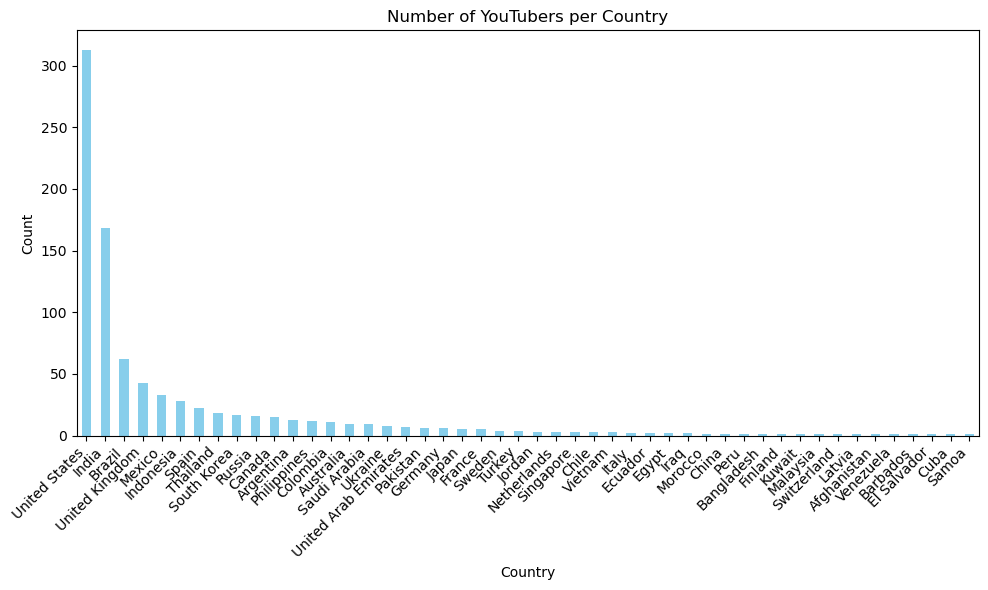

In [11]:
base_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
folium.TileLayer('cartodbpositron').add_to(base_map)

# Create GeoDataFrame for YouTuber locations
youtuber_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Create a choropleth layer for all countries
choropleth = folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    fill_color='white',  # Set non-YouTuber areas to white initially
    fill_opacity=1,  # Set opacity to 1 to hide non-YouTuber areas
    line_opacity=1,  # Set opacity to 1 to hide non-YouTuber areas
    legend_name='YouTuber Subscribers'
).add_to(base_map)

# Convert GeoDataFrame to GeoJSON for marker cluster
youtuber_geojson = youtuber_gdf.to_json()

# Create marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Add markers for YouTuber locations
for idx, row in youtuber_gdf.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>YouTuber:</b> {row['Youtuber']}<br><b>Subscribers:</b> {row['subscribers']}",
    ).add_to(marker_cluster)

# Mask the choropleth layer to color only the areas where YouTubers are located
folium.GeoJson(
    youtuber_geojson,
    name='youtuber_geojson',
    style_function=lambda x: {'fillColor': 'orange', 'color': 'orange', 'weight': 1.5},
    overlay=True,
).add_to(choropleth)


# Determine the country with the highest number of YouTubers
top_country = youtuber_gdf['Country'].value_counts().idxmax()

# Create a bar graph showing the count of YouTubers per country
country_counts = youtuber_gdf['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Number of YouTubers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# Add layer control
folium.LayerControl().add_to(base_map)

base_map

In [139]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
import hvplot.pandas  # Import hvPlot for interactive plotting

# Create a Panel extension
pn.extension()

# Assuming df is your DataFrame containing the data

# Heading
heading = pn.pane.Markdown("## Dashboard with Multiple Components")

# Data Table
data_table = pn.widgets.DataFrame(df, name="Data Table", width=800)

# Create the base map
base_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2, width ='100%',height=600)
folium.TileLayer('cartodbpositron').add_to(base_map)

# Create GeoDataFrame for YouTuber locations
youtuber_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Create a choropleth layer for all countries
choropleth = folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    fill_color='white',  # Set non-YouTuber areas to white initially
    fill_opacity=1,  # Set opacity to 1 to hide non-YouTuber areas
    line_opacity=1,  # Set opacity to 1 to hide non-YouTuber areas
    legend_name='YouTuber Subscribers'
).add_to(base_map)

# Convert GeoDataFrame to GeoJSON for marker cluster
youtuber_geojson = youtuber_gdf.to_json()

# Create marker cluster
marker_cluster = MarkerCluster().add_to(base_map)

# Add markers for YouTuber locations
for idx, row in youtuber_gdf.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>YouTuber:</b> {row['Youtuber']}<br><b>Subscribers:</b> {row['subscribers']}",
    ).add_to(marker_cluster)

# Mask the choropleth layer to color only the areas where YouTubers are located
folium.GeoJson(
    youtuber_geojson,
    name='youtuber_geojson',
    style_function=lambda x: {'fillColor': 'orange', 'color': 'orange', 'weight': 1.5},
    overlay=True,
).add_to(choropleth)

# Graphs
# Create a bar graph showing the count of YouTubers per country
country_counts = youtuber_gdf['Country'].value_counts().head(10)  # Example: Display top 10 countries
bar_plot = country_counts.hvplot.bar(
    title='Number of YouTubers per Country',
    xlabel='Country',
    ylabel='Count',
    width=800,
    height=400,
    rot=45,
    color='skyblue'
)



# Create a layout combining all components
layout = pn.Column(
    heading,
    pn.Row( base_map),
    pn.Row(data_table),
   
)

# Display the layout
layout.servable()


Column
    [0] Markdown(str)
    [1] Row
        [0] Folium(Map)
    [2] Row
        [0] DataFrame(name='Data Table', value=     rank     ..., width=800)